In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\fadg1\OneDrive\Escritorio\Analytics\PRUEBA TECNICA ANALSTAS DE DATOS\Datos- Modelación/Housing.xlsx", sheet_name='Data')
df1 = pd.read_excel(r"C:\Users\fadg1\OneDrive\Escritorio\Analytics\PRUEBA TECNICA ANALSTAS DE DATOS\Datos- Modelación/Housing.xlsx", sheet_name='Forecast')

In [3]:
## CAMBIAR OBJECT INT 0 Y 1
gen_ = {"yes" :1, "no" :0}
df["driveway"] = df["driveway"].map(gen_)
df["recroom"] = df["recroom"].map(gen_)
df["fullbase"] = df["fullbase"].map(gen_)
df["gashw"] = df["gashw"].map(gen_)
df["airco"] = df["airco"].map(gen_)
df["prefarea"] = df["prefarea"].map(gen_)

In [4]:
from numpy import int64

## CAMBIAR FLOAT A INT64
df["price"] = df["price"].astype(int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62080 entries, 0 to 62079
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     62080 non-null  int64
 1   lotsize   62080 non-null  int64
 2   bedrooms  62080 non-null  int64
 3   bathrms   62080 non-null  int64
 4   stories   62080 non-null  int64
 5   driveway  62080 non-null  int64
 6   recroom   62080 non-null  int64
 7   fullbase  62080 non-null  int64
 8   gashw     62080 non-null  int64
 9   airco     62080 non-null  int64
 10  garagepl  62080 non-null  int64
 11  prefarea  62080 non-null  int64
dtypes: int64(12)
memory usage: 5.7 MB


In [5]:
## CAMBIAR OBJECT INT 0 Y 1
gen_ = {"yes" :1, "no" :0}
df1["driveway"] = df1["driveway"].map(gen_)
df1["recroom"] = df1["recroom"].map(gen_)
df1["fullbase"] = df1["fullbase"].map(gen_)
df1["gashw"] = df1["gashw"].map(gen_)
df1["airco"] = df1["airco"].map(gen_)
df1["prefarea"] = df1["prefarea"].map(gen_)

In [6]:
## REMPLAZAR ESPACIOS VACIOS CON CERO SIN MODIFICAR EL DF
df1.fillna(0, inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lotsize   275 non-null    int64  
 1   bedrooms  275 non-null    int64  
 2   bathrms   275 non-null    int64  
 3   stories   275 non-null    int64  
 4   driveway  275 non-null    int64  
 5   recroom   275 non-null    float64
 6   fullbase  275 non-null    int64  
 7   gashw     275 non-null    int64  
 8   airco     275 non-null    int64  
 9   garagepl  275 non-null    int64  
 10  prefarea  275 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 23.8 KB


In [8]:
## SE DEFINE precio
precio = df["price"]
features = df1

## CAMBIAR FLOAT A INT64
## features["recroom"] = features["recroom"].astype(int)

## CONCOES CANTIDAD DE DATOS Y VARIABLES
print("dataframe df tiene {} puntos de datos con {} varibles.".format(*df.shape))

print("dataframe df1 tiene {} puntos de datos con {} varibles.".format(*df1.shape))

dataframe df tiene 62080 puntos de datos con 12 varibles.
dataframe df1 tiene 275 puntos de datos con 11 varibles.


In [9]:
## CALCULOS ESATDISTICOS

## PRECIO MINIMO
precio_minimo = np.amin(precio)
## PRECIO MAXIMO
precio_maximo = np.amax(precio)
## PROMEDIO DE PRECIO
precio_promedio = np.mean(precio)
## MEDIANA DE PRECIO
precio_mediana = np.median(precio)
## DESVIACION ESTANDAR DE PRECIO
precio_desviaciostda = np.std(precio)

print("Precio minimo: ${}".format(precio_minimo))
print("Precio maximo: ${}".format(precio_maximo))
print("Precio promedio: ${}".format(precio_promedio))
print("Precio mediana: ${}".format(precio_mediana))
print("Precio desviacion std: ${}".format(precio_desviaciostda))


Precio minimo: $28075
Precio maximo: $301233
Precio promedio: $101971.23650128866
Precio mediana: $92280.0
Precio desviacion std: $45122.61697210719


c:\Users\fadg1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


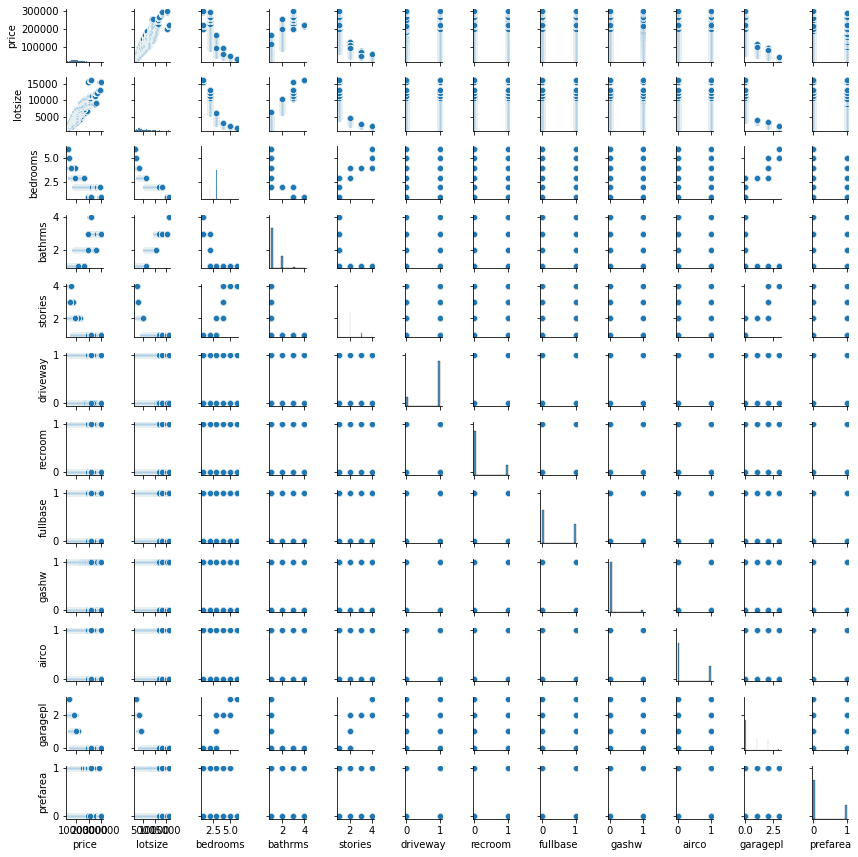

In [10]:
## EXPLORIN DATA ANALITICS EDA
## GRAFICOS DE DISPERSION E HISTOGRAMAS

sns.pairplot(df, size=1)
plt.tight_layout()

## SE OBSERVA UNA RELACION LINEAL ENTRE EL PRECIO (PRICE) Y EL TAMAÑO DE LA VIVIENDA (LOTSIZE)

In [11]:
df.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

<AxesSubplot:>

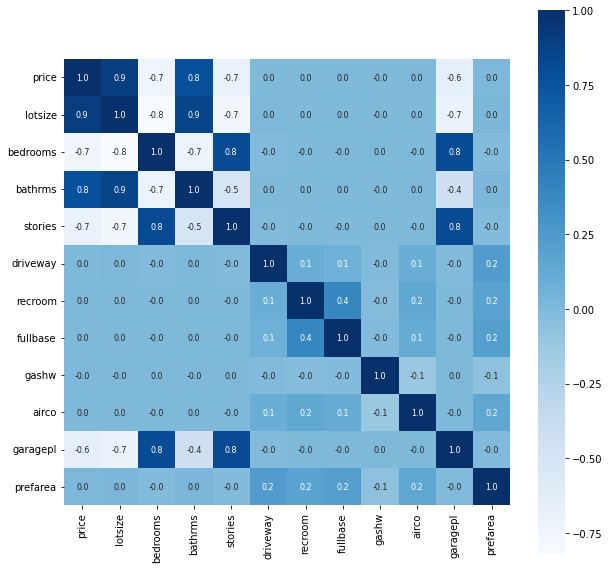

In [12]:
## CORRELACION DE LAS VARIABLES
correlacion = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlacion, cbar=True, square=True, fmt=".1f", annot= True, annot_kws={"size":8}, cmap="Blues")

## SE EVIDENCIA MAYOR CORRELACION ENTRE LOTSIZE(TAMAÑO) Y PRICE 0.90
## SE EVIDENCIA MAYOR CORRELACION ENTRE STORIES(PLANTAS) Y PRICE 0.77

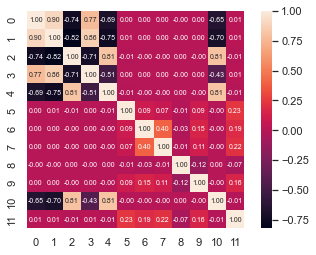

In [13]:
## MATRIZ DE CORRELACION

from numpy import column_stack


cm = np.corrcoef(df.values.T)
sns.set(font_scale=1)
hm =sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size": 7},)

## SE EVIDENCIA MAYOR CORRELACION ENTRE LOTSIZE(TAMAÑO) Y PRICE 0.90
## SE EVIDENCIA MAYOR CORRELACION ENTRE STORIES(PLANTAS) Y PRICE 0.77

In [14]:
## SE AJUSTA DIMENSION DE DATOS =275
preciofilas = precio[:275]

In [15]:
preciofilas.info()

<class 'pandas.core.series.Series'>
RangeIndex: 275 entries, 0 to 274
Series name: price
Non-Null Count  Dtype
--------------  -----
275 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [16]:
from sklearn.model_selection import train_test_split

## SE CONSTRUYE MODELO DATOS DE ESTRENAMIENTO Y PRUEBA
x_train , x_test , y_train , y_test = train_test_split(features , preciofilas , test_size = 0.33, random_state =42)

print("Entrenamiento y prueba se completo")

Entrenamiento y prueba se completo


In [17]:
## MODELO TECNICA REGRESION LINEAL PERMITE PREDECIR EL COMPORTAMIENTO DE UNA VARIABLE
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
## EVALUACION
training_data_prediction = reg.predict(x_train)
print(training_data_prediction)

[29438.45500327 28518.94465726 28760.02238291 28663.29374013
 29475.83103761 28616.19805199 28829.25202287 28738.93554634
 29793.17470217 29483.27950865 28528.35587144 29981.41518221
 28415.60822772 28658.12652203 28608.8246087  28736.72504221
 28717.32883953 28543.64784839 28626.7465694  28844.73516807
 28772.9076347  29293.5992194  28566.22064901 28565.44016994
 28644.65603267 29256.66199794 28922.90746135 29370.91292705
 28666.13266114 29672.09230445 28513.07874464 28621.78694675
 29003.96426138 28668.75738558 28714.75134806 28644.99023968
 28419.53463787 28711.51990512 28604.149758   28730.29681648
 28529.66946997 28663.51340216 28644.88836415 29383.108334
 28760.09110166 28792.73229775 28669.77033792 28775.44361747
 28839.3720902  28805.59434779 29302.50603175 28784.73647224
 28620.3835911  28645.5672251  29695.65767581 28726.53611892
 28755.24703861 28469.10582763 29350.03494206 28666.08283535
 28860.63097821 28906.22497876 28608.21472391 28778.37128015
 28473.04877348 28669.3346

In [19]:
## R2 ERROR CAUDRADO
from sklearn import metrics

valor_1 = metrics.r2_score(y_train, training_data_prediction)

## ERROR MEDIO ABSOLUTO

valor_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R2 ERROR CAUDRADO : ", valor_1)
print("ERROR MEDIO ABSOLUTO : ", valor_2)

R2 ERROR CAUDRADO :  0.6119614068976087
ERROR MEDIO ABSOLUTO :  223.57906804856205


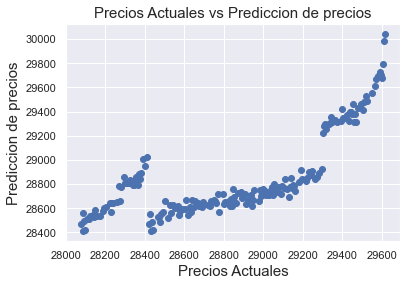

In [20]:
plt.scatter(y_train, training_data_prediction )
plt.xlabel("Precios Actuales", fontsize =15 )
plt.ylabel("Prediccion de precios", fontsize =15 )
plt.title("Precios Actuales vs Prediccion de precios", fontsize =15)
plt.show()

In [21]:
X = df1 ## SE DEFINE X VARIABLES DE DF1
Y = df["price"] ## SE DEFINE SOLO PRECIOS DE DF
Y = Y[:275] ## SE CAMBIA LONGITUD A 275
print(Y)

0      28075
1      28085
2      28086
3      28093
4      28098
       ...  
270    29595
271    29600
272    29606
273    29612
274    29617
Name: price, Length: 275, dtype: int64


In [ ]:
## MODELO CON XGBRegressor
## SE CONSTRUYE MODELO TECNICA DE POTENCIACION DEL GRADIENTE GRADIENTE CONJUNTO DE ARBOLES DE DECISION ANALISIS PREDICTIVO

In [22]:
from sklearn.model_selection import train_test_split

## SE CONSTRUYE MODELO DATOS DE ESTRENAMIENTO Y PRUEBA
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state =2)

print("Entrenamiento y prueba se completo")

Entrenamiento y prueba se completo


In [23]:
print(X.shape, X_train.shape, X_test.shape)

(275, 11) (220, 11) (55, 11)


In [24]:
## MODELO CON XGBOOST REGRESSOR

from xgboost import XGBRegressor

modelo = XGBRegressor()

In [25]:
## ENTRENAR EL MODELO CON X_TRAIN
modelo.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [26]:
## EVALUACION PARA LAS PREDICCIONES EN TRAIN DATOS
training_data_prediction1 = modelo.predict(X_train)
print(training_data_prediction1)

[28380.588 28099.104 29396.998 28861.705 29533.41  29469.201 28309.018
 29255.354 28644.662 28723.39  29068.695 29105.42  29092.738 28210.86
 29515.947 28687.506 28187.486 28238.658 28475.395 29504.72  28859.617
 28435.354 28155.361 29442.02  28177.352 29345.074 28948.086 28215.896
 29058.738 29538.043 29131.688 29481.37  28903.56  28596.756 28337.438
 28112.021 28142.865 28971.268 28605.635 28103.994 29312.076 28086.244
 28519.354 29488.24  29025.525 29070.22  28956.928 28931.754 28868.059
 29200.732 28804.346 29525.932 28953.367 28718.031 28582.393 29287.832
 28655.123 28661.146 29363.672 29494.836 29335.973 28128.174 28309.01
 29606.02  28309.01  29355.719 29041.14  29206.828 29600.055 29090.436
 28337.77  28311.236 28823.5   29378.934 28396.863 28762.15  28884.854
 29309.688 29426.88  28997.982 29081.8   28086.652 28699.293 29478.139
 29217.387 28675.998 28123.791 29161.79  29522.365 29009.727 28195.127
 29496.006 29128.373 28746.36  29566.55  29452.137 29582.617 28515.64
 29319.97

In [27]:
## R2 ERROR CAUDRADO
from sklearn import metrics

valor_1 = metrics.r2_score(Y_train, training_data_prediction1)

## ERROR MEDIO ABSOLUTO

valor_2 = metrics.mean_absolute_error(Y_train, training_data_prediction1)

print("R2 ERROR CAUDRADO : ", valor_1)
print("ERROR MEDIO ABSOLUTO : ", valor_2)

R2 ERROR CAUDRADO :  0.9999479349054494
ERROR MEDIO ABSOLUTO :  1.6709250710227272


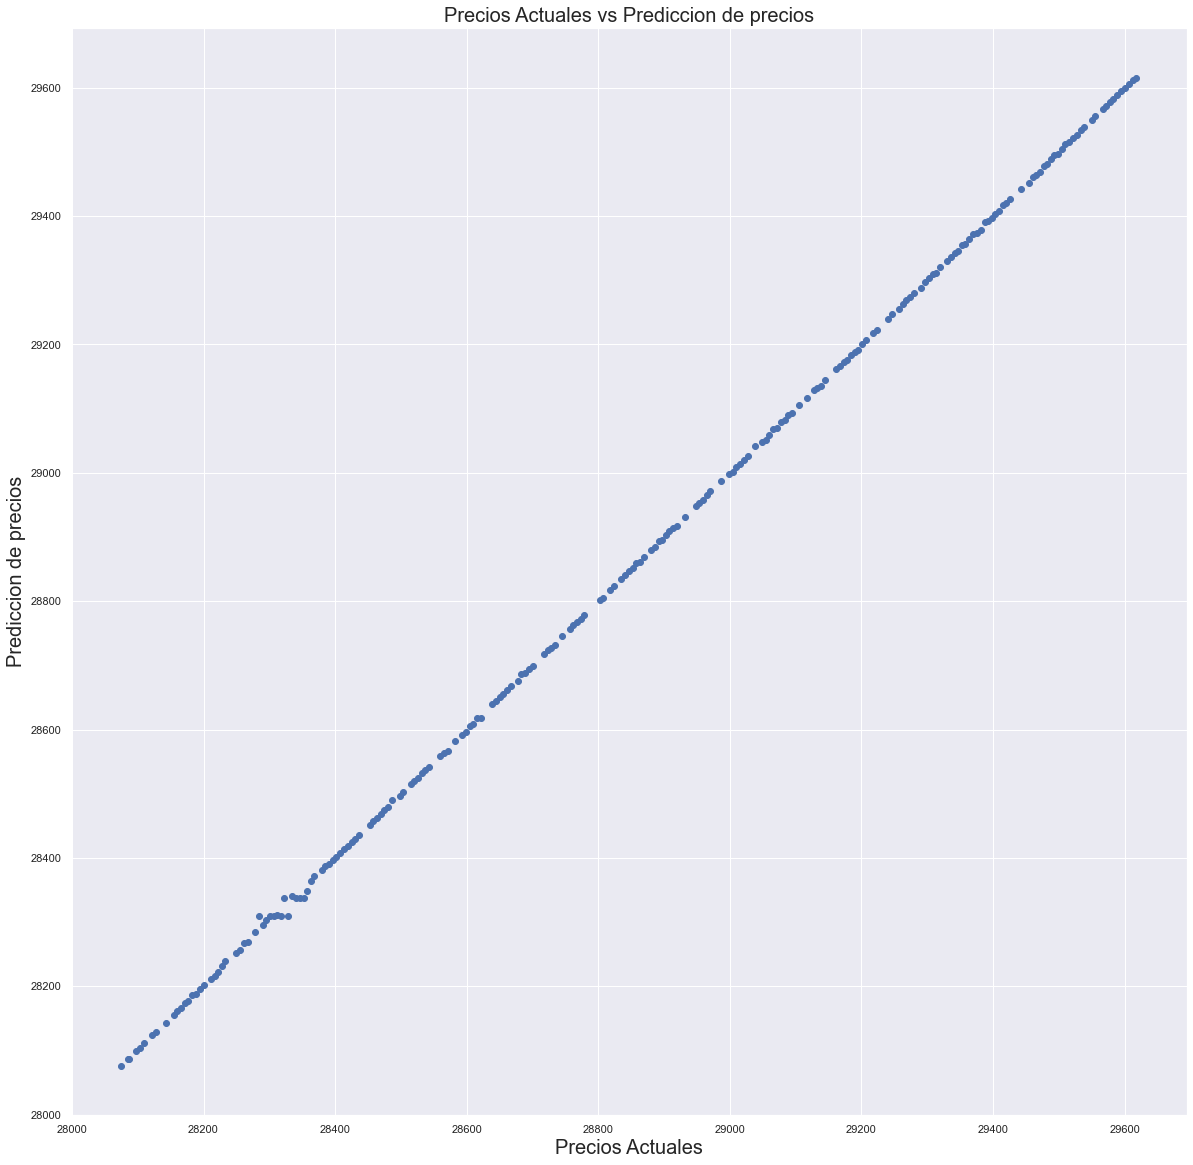

In [28]:
fig = plt.figure(figsize=(20,20))
plt.scatter(Y_train, training_data_prediction1 )
plt.xlabel("Precios Actuales", fontsize =20 )
plt.ylabel("Prediccion de precios", fontsize =20 )
plt.title("Precios Actuales vs Prediccion de precios", fontsize =20)
plt.show()

In [29]:
## EXPORTAR DATOS PREDICCION
from pandas import DataFrame


prediccion = DataFrame(training_data_prediction1)
prediccion
prediccion.to_excel(r"C:\Users\fadg1\OneDrive\Escritorio\Analytics\PRUEBA TECNICA ANALSTAS DE DATOS\Datos- Modelación/Prediccion.xlsx")

In [30]:
## EVALUACION PARA LAS PREDICCIONES EN TEST DATOS
test_data_prediction1 = modelo.predict(X_test)
print(test_data_prediction1)

[28933.703 28277.428 28712.996 28198.762 28696.305 29248.93  28825.268
 28386.193 28942.697 29158.979 29103.258 28979.752 28275.836 28501.148
 29453.064 28299.596 29180.48  29022.654 29090.096 28181.25  28697.088
 29110.883 29427.47  28978.115 29533.033 28112.691 29250.62  29362.387
 28794.984 28509.963 28246.602 28942.852 29207.91  28273.76  29111.986
 29246.027 28478.686 28934.23  28146.332 28995.68  28692.7   28942.578
 28878.125 28767.076 29196.047 28485.34  28748.201 29053.785 29424.908
 28554.979 28699.623 29559.447 28803.514 28439.203 28792.38 ]


In [31]:
## R2 ERROR CAUDRADO
from sklearn import metrics

valor_1 = metrics.r2_score(Y_test, test_data_prediction1)

## ERROR MEDIO ABSOLUTO

valor_2 = metrics.mean_absolute_error(Y_test, test_data_prediction1)

print("R2 ERROR CAUDRADO : ", valor_1)
print("ERROR MEDIO ABSOLUTO : ", valor_2)

R2 ERROR CAUDRADO :  0.725480350266131
ERROR MEDIO ABSOLUTO :  94.24996448863637


In [44]:
## RANDOM FOREST

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import rcParams

In [46]:
df1.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [35]:
X = df1 ## SE DEFINE X VARIABLES DE DF1
Y = df["price"] ## SE DEFINE SOLO PRECIOS DE DF
Y = Y[:275] ## SE CAMBIA LONGITUD A 275

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con 100 arboles
model = RandomForestClassifier(n_estimators=100, bootstrap = True,verbose=2, max_features = 'sqrt')
# entrenar!
model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(verbose=2)

In [47]:
pred_y = model.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [42]:
## R2 ERROR CAUDRADO
from sklearn import metrics

valor_1 = metrics.r2_score(Y_train, pred_y)

## ERROR MEDIO ABSOLUTO

valor_2 = metrics.mean_absolute_error(Y_train, pred_y)

print("R2 ERROR CAUDRADO : ", valor_1)
print("ERROR MEDIO ABSOLUTO : ", valor_2)

R2 ERROR CAUDRADO :  0.9999990609599616
ERROR MEDIO ABSOLUTO :  0.03125


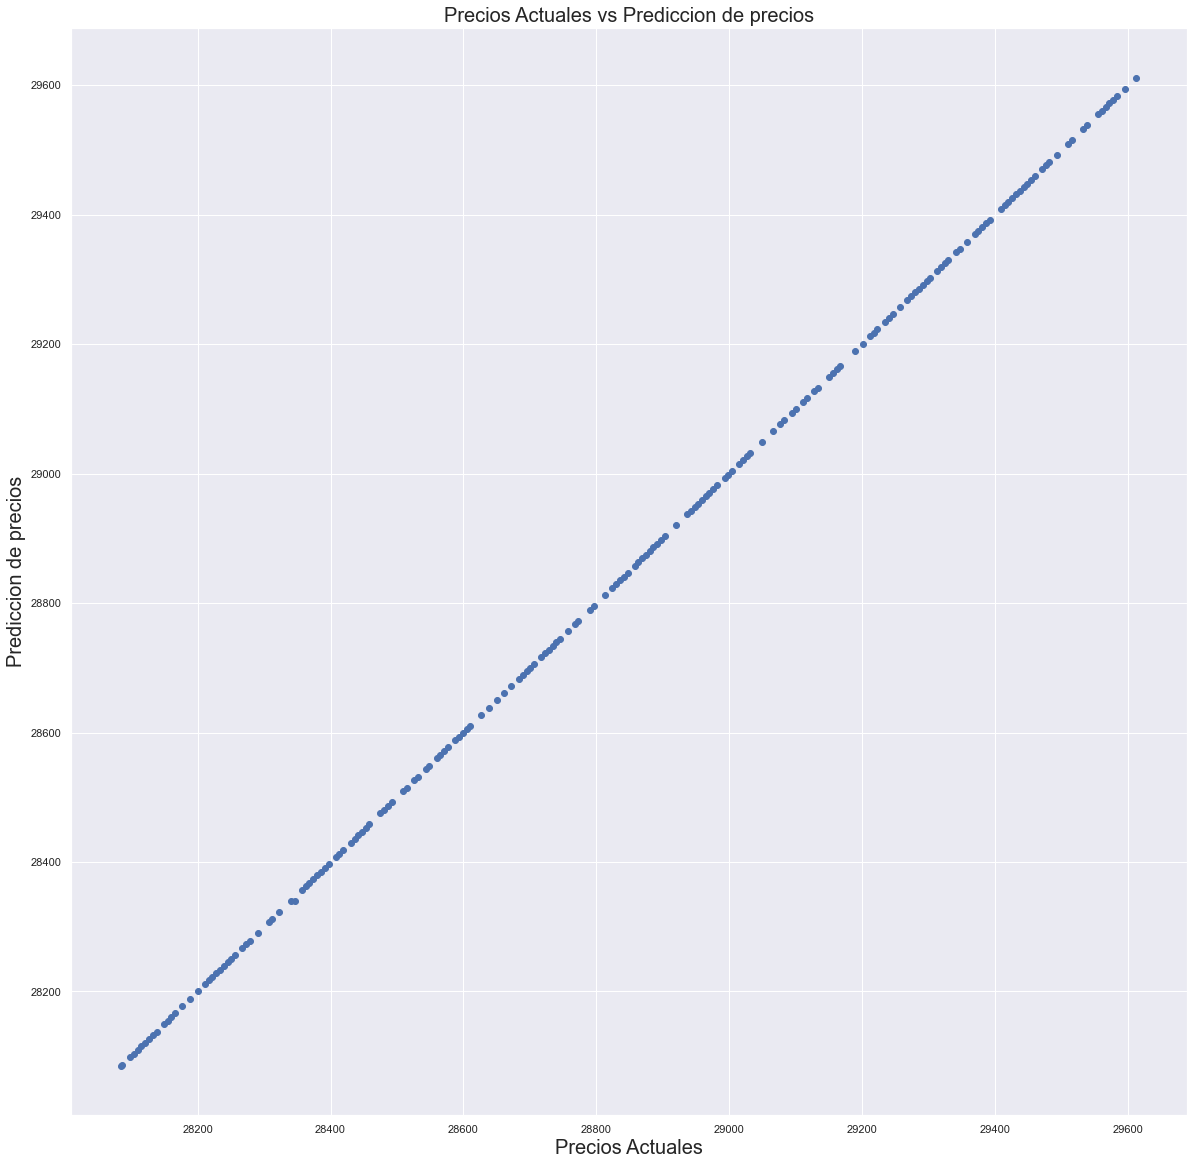

In [43]:
fig = plt.figure(figsize=(20,20))
plt.scatter(Y_train, pred_y )
plt.xlabel("Precios Actuales", fontsize =20 )
plt.ylabel("Prediccion de precios", fontsize =20 )
plt.title("Precios Actuales vs Prediccion de precios", fontsize =20)
plt.show()

In [ ]:
## RANDOM FOREST MAS VELOZ

In [58]:
# otro modelo, variando hiperparámetros
model3 = RandomForestClassifier(n_estimators=100, max_features = 'sqrt', verbose=2, max_depth=6,
                               oob_score=True, random_state=50)
# a entrenar
model3.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

RandomForestClassifier(max_depth=6, oob_score=True, random_state=50, verbose=2)

In [59]:
pred_y1 = model3.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [60]:
## R2 ERROR CAUDRADO
from sklearn import metrics

valor_1 = metrics.r2_score(Y_train, pred_y1)

## ERROR MEDIO ABSOLUTO

valor_2 = metrics.mean_absolute_error(Y_train, pred_y1)

print("R2 ERROR CAUDRADO : ", valor_1)
print("ERROR MEDIO ABSOLUTO : ", valor_2)

R2 ERROR CAUDRADO :  0.9322138297613999
ERROR MEDIO ABSOLUTO :  27.010416666666668


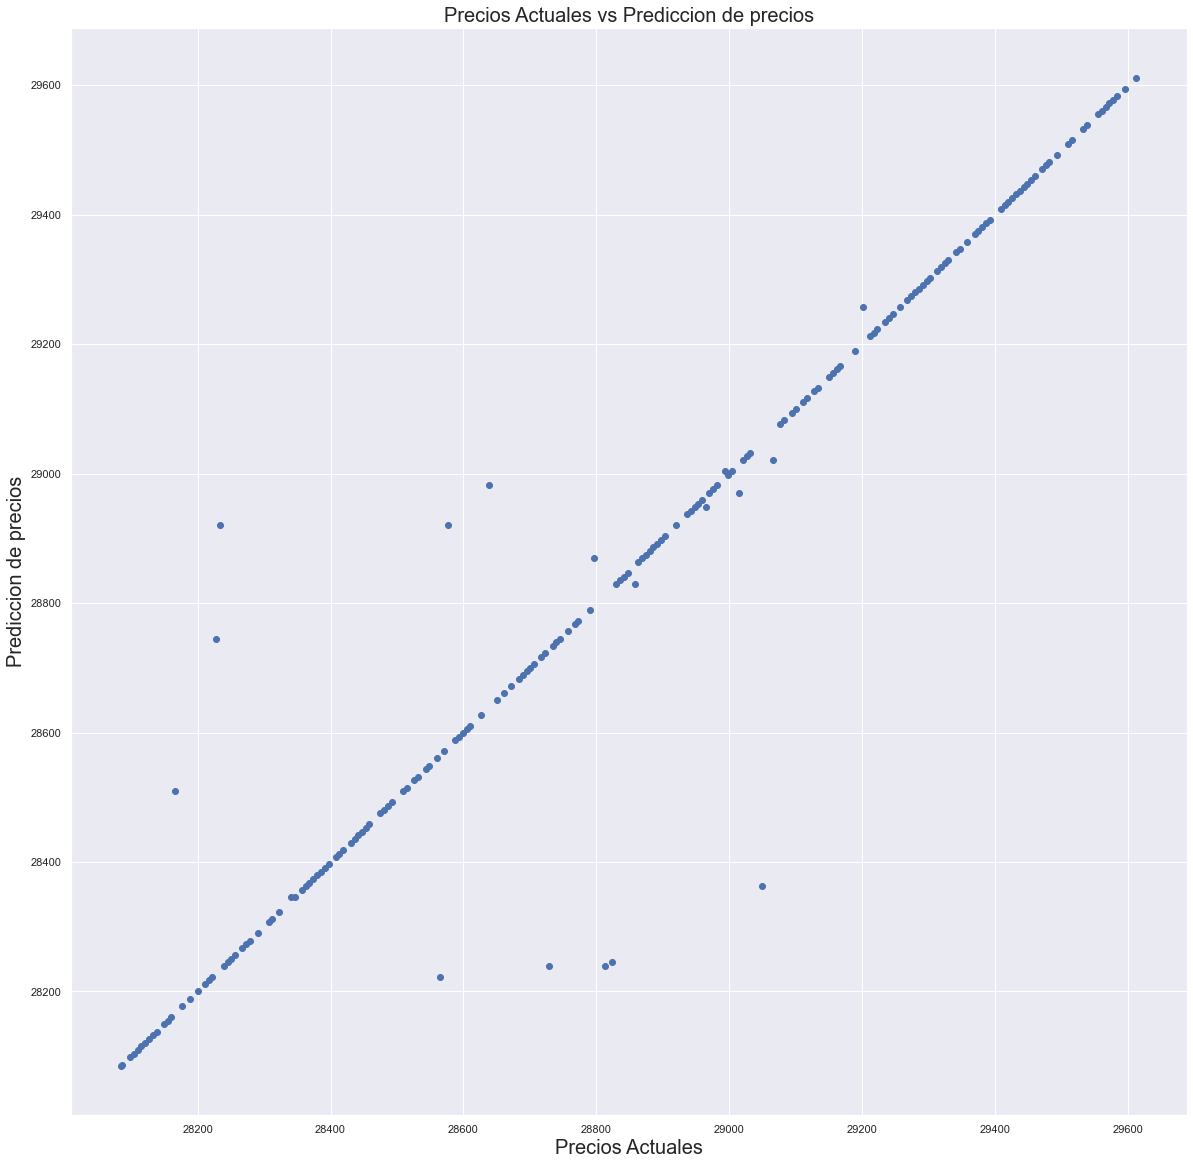

In [61]:
fig = plt.figure(figsize=(20,20))
plt.scatter(Y_train, pred_y1 )
plt.xlabel("Precios Actuales", fontsize =20 )
plt.ylabel("Prediccion de precios", fontsize =20 )
plt.title("Precios Actuales vs Prediccion de precios", fontsize =20)
plt.show()